In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('DataAnalyst_EDA.csv', on_bad_lines='skip')

In [9]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min Salary', 'Max Salary', 'Avg Salary', 'State',
       'Programming Lang', 'Age', 'same_state', 'desc_len', 'Competitors_cnt'],
      dtype='object')

In [10]:
# relevant columns
df_model = df[['Avg Salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors_cnt', 'State', 'same_state', 'Age', 'Programming Lang', 'desc_len']]

In [11]:
# get dummy data
df_dum = pd.get_dummies(df_model)
df_dum

,Avg Salary,Rating,Competitors_cnt,same_state,Age,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,...,"Programming Lang_python,sql,tableau","Programming Lang_python,sql,tableau,powerbi","Programming Lang_python,tableau","Programming Lang_python,tableau,powerbi",Programming Lang_sql,"Programming Lang_sql,powerbi","Programming Lang_sql,tableau","Programming Lang_sql,tableau,powerbi",Programming Lang_tableau,"Programming Lang_tableau,powerbi"
0,51.5,3.2,0,1,63,7057,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,51.5,3.8,0,1,131,4702,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,51.5,3.4,1,1,21,4688,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,51.5,4.1,0,0,22,5249,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,51.5,3.9,1,1,15,3376,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,91.0,2.5,0,0,-1,497,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2248,91.0,2.9,3,1,89,4214,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2249,91.0,-1.0,0,0,-1,2372,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2250,91.0,3.1,0,0,40,4256,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# test train split
from sklearn.model_selection import train_test_split
X = df_dum.drop('Avg Salary', axis = 1)
y = df_dum['Avg Salary'].values
X = X.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_copy = X


In [14]:
# multiple linear regression using statsmodels
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     5.646
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           4.16e-74
Time:                        06:54:54   Log-Likelihood:                -7871.7
No. Observations:                1801   AIC:                         1.605e+04
Df Residuals:                    1650   BIC:                         1.688e+04
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 47.1546      2.616     18.028      0.000      42.024      52.285
Rating                                                 0.2588      0.484      0.535      0.593      -0.690       1.208
Competitors_cnt                                       -0.9020      0.529     -1.707      0.088      -1.939       0.135
same_state                                             0.5643      1.353      0.417      0.677      -2.089       3.217
Age                                                   -0.0116      0.018     -0.655      0.513      -0.046       0.023
desc_len                                              -0.0003      0.000     -1.095      0.273      -0.001       0.000
Size_-1                                                5.0735      1.084      4.682      0.000       2.948       7.199
Size_1 to 50 employees                                 2.4319      1.749      1.390      0.165      -0.999       5.862
Size_10000+ employees                                  5.5443      2.223      2.494      0.013       1.183       9.905
Size_1001 to 5000 employees                            7.7510      1.575      4.920      0.000       4.661      10.841
Size_201 to 500 employees                              3.2319      1.641      1.969      0.049       0.013       6.451
Size_5001 to 10000 employees                           7.8218      2.527      3.095      0.002       2.865      12.778
Size_501 to 1000 employees                             4.8946      1.848      2.649      0.008       1.270       8.519
Size_51 to 200 employees                               5.7222      1.472      3.886      0.000       2.834       8.610
Size_Unknown                                           4.6834      3.553      1.318      0.188      -2.286      11.653
Type of ownership_-1                                   5.0735      1.084      4.682      0.000       2.948       7.199
Type of ownership_College / University                14.9206      7.638      1.954      0.051      -0.060      29.901
Type of ownership_Company - Private                    2.9694      2.379      1.248      0.212      -1.696       7.635
Type of ownership_Company - Public                     3.1375      2.650      1.184      0.237      -2.061       8.336
Type of ownership_Contract                             6.8987      6.422      1.074      0.283      -5.697      19.494
Type of ownership_Franchise                           -0.8568     15.045     -0.057      0.955     -30.366      28.652
Type of ownership_Government                          -7.7384      7.163     -1.080      0.280     -21.789       6.312
Type of ownership_Hospital                             6.1884      5.595      1.106      0.269      -4.787  

In [15]:
# linear regression model using scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-9049637.147898383

In [31]:
# lasso regression
from sklearn.linear_model import Lasso
lm_l = Lasso()
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

-16.049749030825243

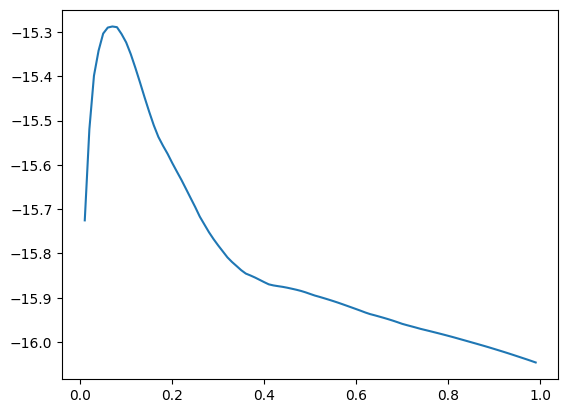

In [17]:
alpha = []
error = []

for i in range(1, 100):
  alpha.append(i/100)
  lml = Lasso(alpha=(i/100))
  error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)))

plt.plot(alpha,error)

In [18]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
6,0.07,-15.287567


In [19]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-16.086231940856948

In [20]:
# GridSearchCV for tuning
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [21]:
gs.best_score_

-15.745149860461842

In [22]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=210)

In [23]:
gs.best_index_

78

In [29]:
tpred_lm = lm.predict(X_test)
tpred_lm

array([8.13132935e+01, 8.07584919e+01, 7.81906008e+01, 6.80511330e+01,
       6.51189699e+01, 9.03201264e+01, 6.77746638e+01, 4.97689086e+01,
       9.51034633e+01, 5.66764027e+01, 8.19133775e+01, 9.43013448e+01,
       9.05709487e+01, 6.79246305e+01, 6.51900990e+01, 6.85479671e+01,
       9.02325598e+01, 8.42985682e+01, 7.08399177e+01, 9.13973838e+01,
       4.72220756e+01, 5.95751097e+01, 5.99457523e+01, 7.11674516e+01,
       7.04689585e+01, 6.86117254e+01, 8.07606909e+01, 5.11403662e+01,
       6.05819556e+01, 7.37213198e+01, 7.59851135e+01, 6.23067347e+01,
       5.14013982e+01, 4.44751494e+01, 6.95930625e+01, 6.84879271e+01,
       7.06592247e+01, 7.97245594e+01, 7.57991199e+01, 6.95477022e+01,
       8.88895861e+01, 8.19064963e+01, 6.27409402e+01, 8.39231178e+01,
       8.85489895e+01, 7.33251427e+01, 7.15095514e+01, 5.63922392e+01,
       7.89186417e+01, 6.07933196e+01, 8.12661356e+01, 8.85999554e+01,
       8.50588080e+01, 5.62167586e+01, 8.39632545e+01, 7.12895463e+01,
      

In [32]:
tpred_lml = lm_l.predict(X_test)
tpred_lml

array([82.81101153, 85.62389069, 68.65675546, 68.38368966, 64.84504169,
       85.45189091, 66.19038886, 69.4067279 , 84.58940608, 65.65645131,
       84.20855396, 85.74475395, 84.54961983, 69.42044141, 69.87718469,
       68.93179716, 85.68478019, 69.50446708, 68.342453  , 85.31415247,
       69.38966339, 64.91734762, 65.72797626, 66.94554715, 68.67697582,
       68.74916484, 68.44915839, 69.42053753, 68.38793852, 69.15859981,
       69.08050767, 64.20714355, 63.23164743, 66.32288446, 69.203683  ,
       68.43724062, 68.87266137, 81.47344821, 69.25682537, 69.94147928,
       85.51075959, 84.20218816, 65.94558472, 84.09187385, 85.40513849,
       69.57544575, 69.42053753, 69.40271329, 67.29884907, 65.53982389,
       85.7072677 , 85.08748505, 85.64226747, 63.69024055, 82.70580729,
       69.40366816, 69.33163559, 84.82471852, 64.79943396, 83.66483346,
       68.58798693, 84.851608  , 68.93891063, 69.67468608, 65.45420387,
       67.84321532, 64.27009395, 84.73424011, 65.28551016, 66.45

In [33]:
tpred_rf = gs.best_estimator_.predict(X_test)
tpred_rf

array([ 73.79166667,  89.68690476,  75.14047619,  83.3202381 ,
        66.38571429,  89.55238095,  66.14047619,  67.76309524,
        89.55      ,  69.96190476,  84.10595238,  89.76428571,
        81.85357143,  69.11547619,  66.71428571,  68.59285714,
        88.08690476,  78.23095238,  68.18452381,  83.35714286,
        50.65      ,  59.0452381 ,  66.4547619 ,  77.37857143,
        68.31666667,  66.27380952,  77.5547619 ,  46.30714286,
        66.9047619 ,  67.36666667,  65.91309524,  64.44880952,
        60.99047619,  57.96309524,  78.25714286,  74.36428571,
        70.09047619,  74.05595238,  80.15357143,  71.68809524,
        89.69761905,  84.10595238,  82.84880952,  66.86071429,
        85.73333333,  73.20833333,  73.87857143,  60.7202381 ,
        74.12857143,  59.41309524,  87.61071429,  71.83333333,
        92.08452381,  62.03809524,  84.24166667,  82.27738095,
        71.85952381,  91.67142857,  62.44047619,  83.79761905,
        54.49761905,  89.09166667,  75.35595238,  71.68

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

1364358.0192308282

In [37]:
mean_absolute_error(y_test, tpred_lml)

16.635008798023033

In [38]:
mean_absolute_error(y_test, tpred_rf)

15.911324041811847

In [39]:
mean_absolute_error(y_test, (tpred_rf+tpred_lm)/2)

682186.6289220827

In [40]:
mean_absolute_error(y_test, (tpred_rf+tpred_lml)/2)

15.966663922252962